In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
customers = pd.read_csv('Data/Customers.csv')
products = pd.read_csv('Data/Products.csv')
transactions = pd.read_csv('Data/transactions.csv')

In [28]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [29]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [30]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [31]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [32]:
print(customers.dtypes)
print(products.dtypes)
print(transactions.dtypes)

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object
TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object


In [33]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

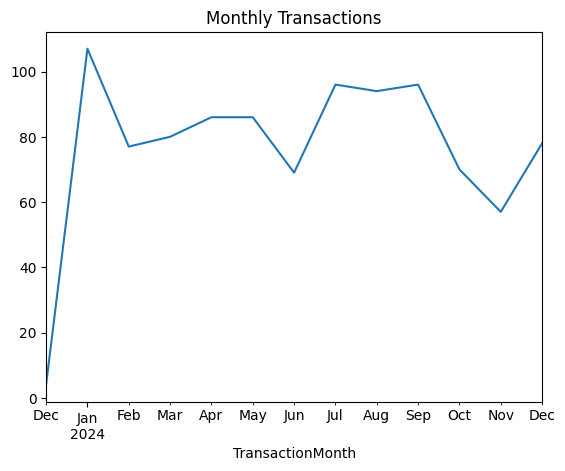

In [34]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')

transactions['TransactionMonth'].value_counts().sort_index().plot(kind='line')
plt.title('Monthly Transactions')
plt.show()


In [35]:
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')


<Axes: xlabel='Region', ylabel='count'>

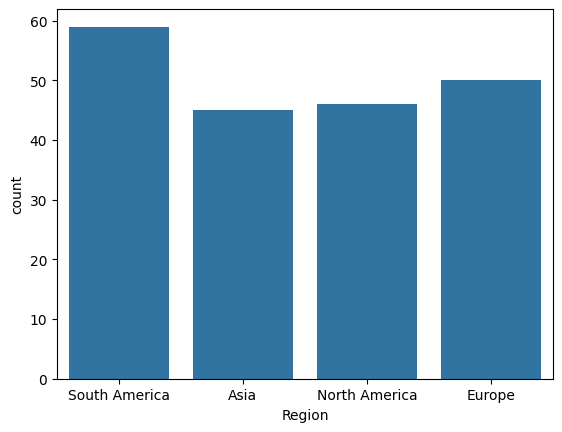

In [36]:
sns.countplot(x='Region', data=customers)


In [37]:
print(transactions['TotalValue'].apply(type).value_counts())

TotalValue
<class 'float'>    1000
Name: count, dtype: int64


In [38]:
transactions = transactions[transactions['TotalValue'].apply(lambda x: isinstance(x, (int, float)))]

In [39]:
transactions['TotalValue'] = pd.to_numeric(transactions['TotalValue'], errors='coerce')
transactions = transactions.dropna(subset=['TotalValue'])

# Analyze Customers:

### Plot region distribution:

/var/folders/l6/z6511d956hv237h12mbrv4d40000gn/T/ipykernel_2933/962997347.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( y='Region',data=customers, palette='viridis')


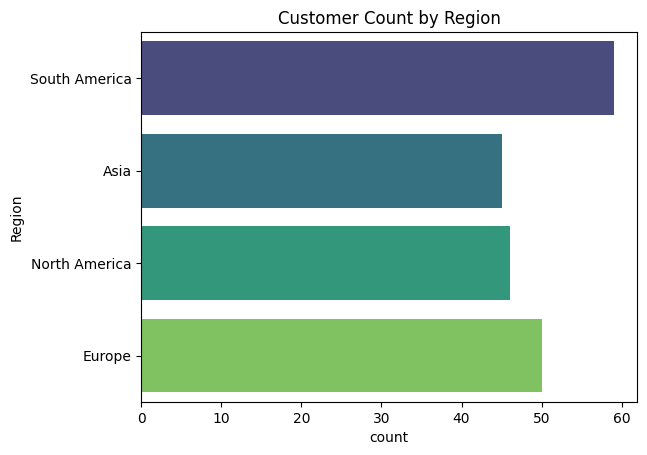

In [40]:
sns.countplot( y='Region',data=customers, palette='viridis')
plt.title('Customer Count by Region')
plt.show()

### Analyze signup date trends:

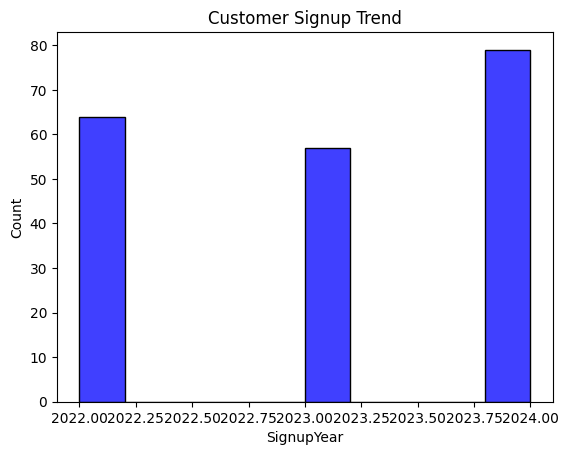

In [41]:
customers['SignupYear'] = customers['SignupDate'].dt.year
sns.histplot(customers['SignupYear'], bins=10, kde=False, color='blue')
plt.title('Customer Signup Trend')
plt.show()

# Analyze Products:

### Most common categories:

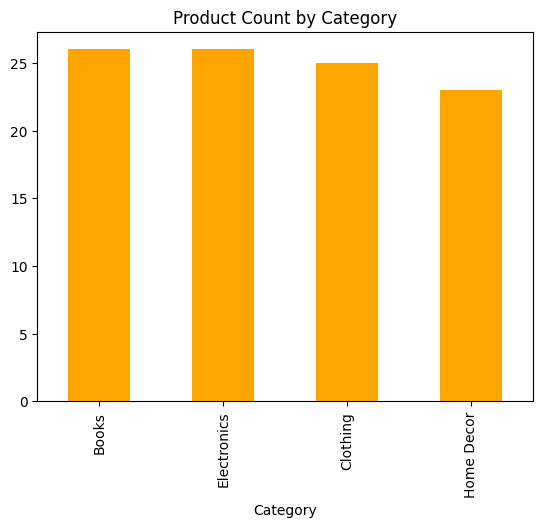

In [42]:
product_counts = products['Category'].value_counts()
product_counts.plot(kind='bar', color='orange')
plt.title('Product Count by Category')
plt.show()

### Price Distribution:

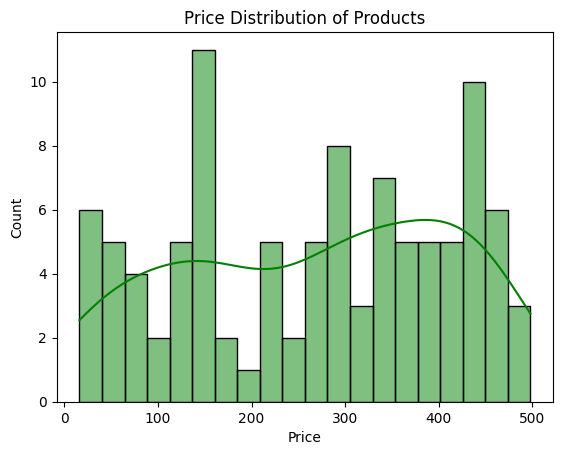

In [43]:
sns.histplot(products['Price'], bins=20, kde=True, color='green')
plt.title('Price Distribution of Products')
plt.show()


# Analyze Transactions:

### Transactions over time:

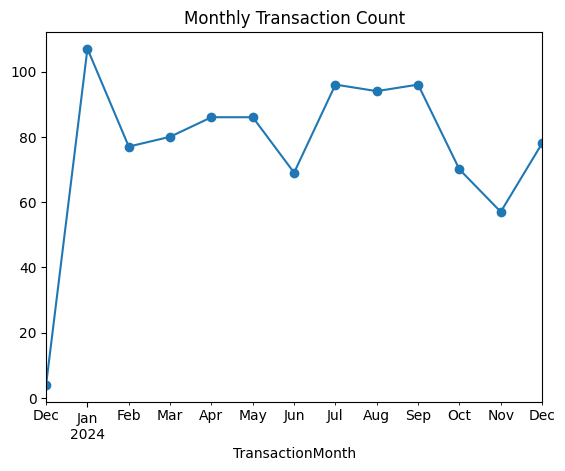

In [44]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions.groupby('TransactionMonth').size().plot(kind='line', marker='o')
plt.title('Monthly Transaction Count')
plt.show()

### Top products by sales:

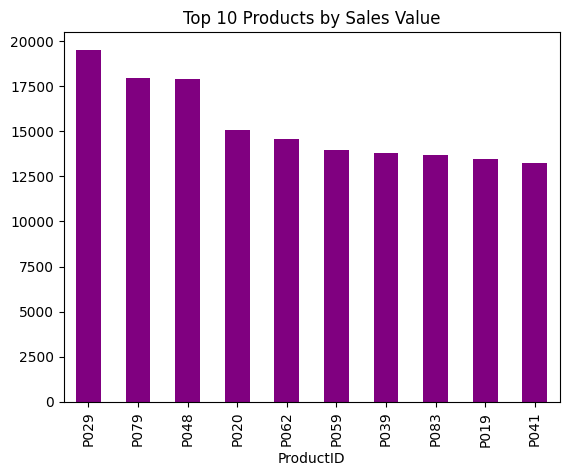

In [45]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='purple')
plt.title('Top 10 Products by Sales Value')
plt.show()


# Multivariate Analysis

### Correlation Heatmap for Transactions:

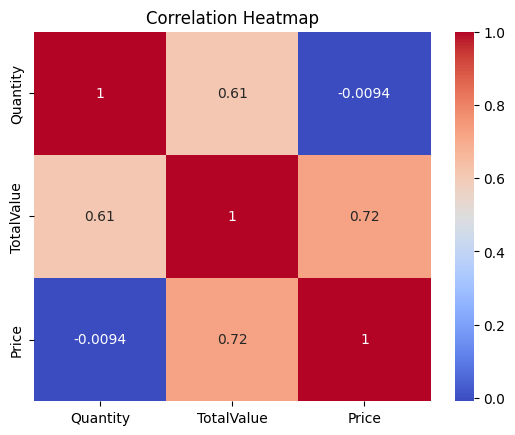

In [46]:
corr_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Customer spending by region:

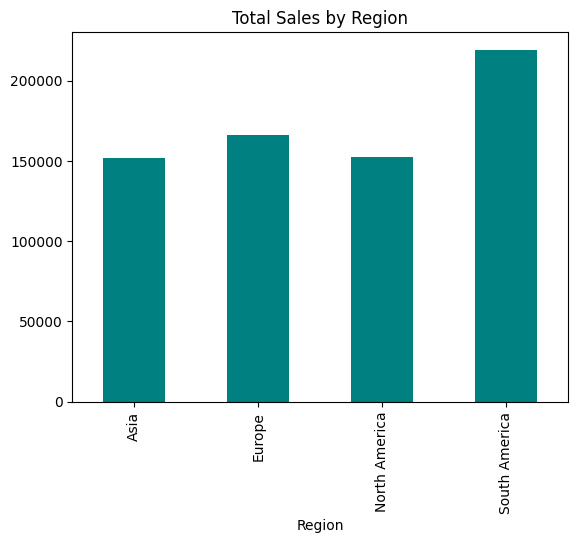

In [47]:
region_sales = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', color='teal')
plt.title('Total Sales by Region')
plt.show()


### Category-wise revenue contribution:

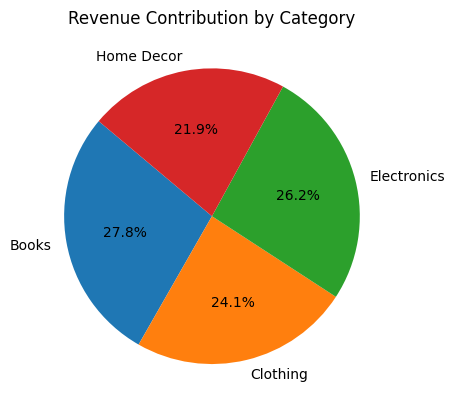

In [48]:
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Revenue Contribution by Category')
plt.ylabel('')
plt.show()
